In [2]:
# Task 6: Bank Marketing Prediction (UCI Dataset)

# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 2: Load dataset
df = pd.read_csv("bank-full.csv", sep=";")  # UCI dataset uses semicolon separator
print("Dataset shape:", df.shape)
df.head()



Dataset shape: (45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
# Step 3: Check for missing values
print(df.isnull().sum())

# Step 4: Basic info
print(df.info())
print(df.describe())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 

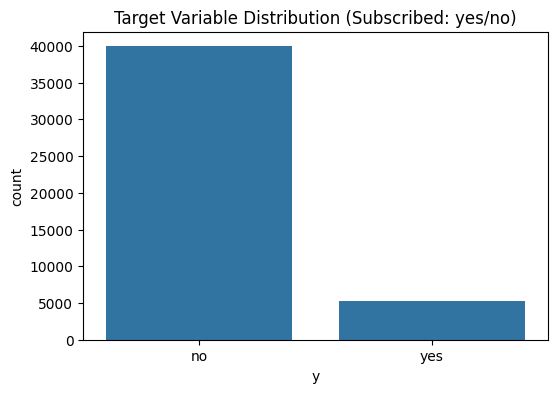

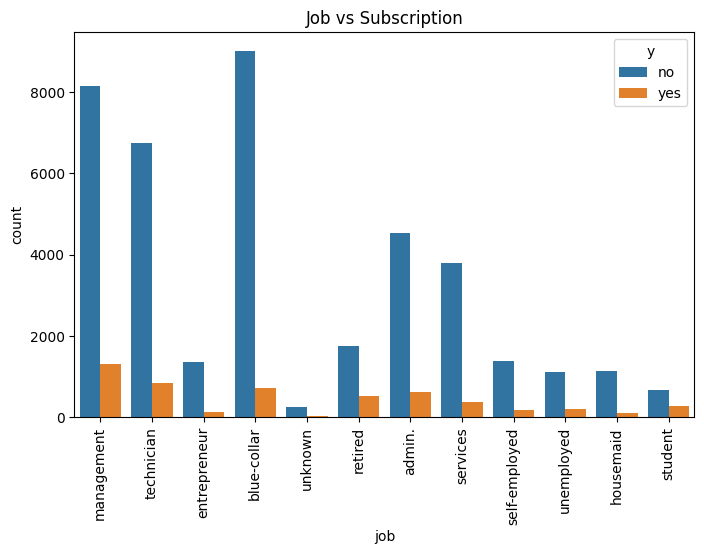

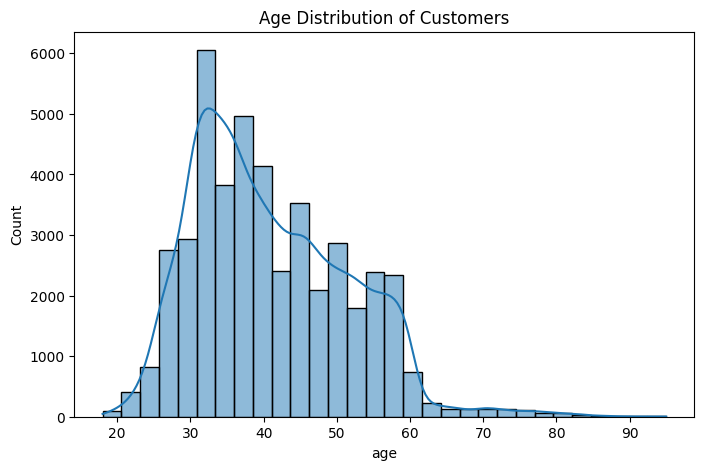

In [4]:
# Step 5: Exploratory Data Analysis
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="y")
plt.title("Target Variable Distribution (Subscribed: yes/no)")
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(data=df, x="job", hue="y")
plt.xticks(rotation=90)
plt.title("Job vs Subscription")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df["age"], bins=30, kde=True)
plt.title("Age Distribution of Customers")
plt.show()


In [5]:
# Step 6: Encode categorical features
categorical_cols = df.select_dtypes(include=["object"]).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [6]:
# Step 7: Split data
X = df.drop("y", axis=1)
y = df["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Step 8: Logistic Regression
log_model = LogisticRegression(max_iter=20000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))

Logistic Regression Accuracy: 0.8879796527700984
Confusion Matrix:
 [[7793  159]
 [ 854  237]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.60      0.22      0.32      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.60      0.63      9043
weighted avg       0.86      0.89      0.86      9043



In [11]:
# Step 9: Decision Tree
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))

Decision Tree Accuracy: 0.8935087913303107
Confusion Matrix:
 [[7644  308]
 [ 655  436]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      7952
           1       0.59      0.40      0.48      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.68      0.71      9043
weighted avg       0.88      0.89      0.88      9043



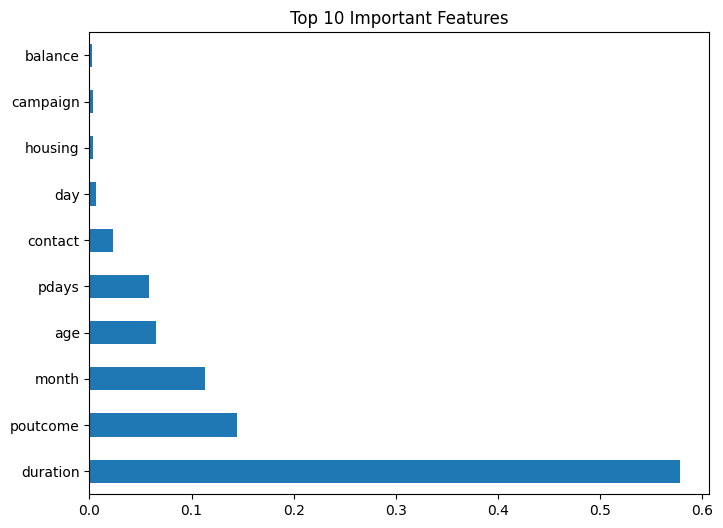

In [12]:
# Step 10: Feature Importance (from Decision Tree)
feat_importance = pd.Series(tree_model.feature_importances_, index=X.columns)
feat_importance.nlargest(10).plot(kind="barh", figsize=(8,6))
plt.title("Top 10 Important Features")
plt.show()